# Patch Tuesday - Vulnerability Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Processed Data for Analysis

This section of the notebook involves loading the processed data from a CSV file into a pandas DataFrame. This step is crucial for preparing the data for subsequent analysis, visualization, or reporting tasks.

### Procedure

1. **Reading CSV Data**:
   - The `pd.read_csv` function from the pandas library is used to read the data stored in the CSV file located at `'../../data/patch_tuesday/processed/msrc_epss_kev.csv'`.
   - This file contains the processed data that integrates MSRC updates, EPSS scores, and CISA KEV data, which was previously prepared and saved in an earlier step of the workflow.

2. **DataFrame Storage**:
   - The data read from the CSV file is stored in the DataFrame `msrc_epss_kev`. This DataFrame will serve as the primary data structure from which all further data manipulations, analyses, and visualizations will be conducted.

### Importance

Loading the data efficiently and correctly is fundamental in ensuring that all subsequent operations are based on accurate and complete information. This step also allows us to validate that the data has been saved and can be accessed as expected, which is critical for maintaining the integrity of the analytical workflow.

### Next Steps

After loading the data, typical next steps might include:
   - Data validation to check for completeness and correctness.
   - Preliminary data analysis to understand the distribution, range, and general characteristics of the data.
   - Detailed data visualizations to uncover patterns or insights and to communicate findings effectively.

This operation marks the transition from data preprocessing to in-depth analysis, setting the stage for insightful conclusions and strategic decision-making based on the data.

In [2]:
msrc_epss_kev = pd.read_csv('../../data/patch_tuesday/processed/msrc_epss_kev.csv')

## Visualization of CVE CVSS Scores Distribution

This section of the notebook is dedicated to visualizing the distribution of the maximum Common Vulnerability Scoring System (CVSS) scores across the vulnerabilities identified in the Patch Tuesday updates. This helps us understand the severity of the vulnerabilities that have been addressed.

### Steps for Visualization:

1. **Setup Plot**: We initialize a matplotlib figure and set the size of the plot. The style is set to 'whitegrid' using seaborn, which helps in better visual distinction of the data points and grid lines.

2. **Violin Plot Creation**:
   - A violin plot is chosen to visualize the distribution because it provides a richer representation of the data density and distribution properties compared to a standard box plot.
   - The data from the DataFrame `msrc_epss_kev` is plotted with 'Max CVSS' as the x-axis variable. The plot uses quartiles for the inner part of the violin, highlighting the median and quartile ranges within the distribution.

3. **Customizing the Plot**:
   - The plot title, axis labels, and tick marks are set with specific font sizes and styles to enhance readability and provide clear information about the plot.
   - The x-axis labels are rotated to avoid overlap, ensuring that each label is legible.

4. **Enhancing Grid and Layout**:
   - Grid lines are added to the y-axis with a dashed style, which helps in assessing the score values across the plot.
   - The plot's right and top spines are removed (despined) to reduce visual clutter and focus attention on the data.

5. **Display the Plot**: Finally, the plot is displayed with `plt.show()`, which outputs the plot in the notebook for review and analysis.

This visualization is a critical tool for quickly assessing the range and commonality of vulnerability severities within the latest Patch Tuesday release, aiding in prioritization and risk assessment processes.

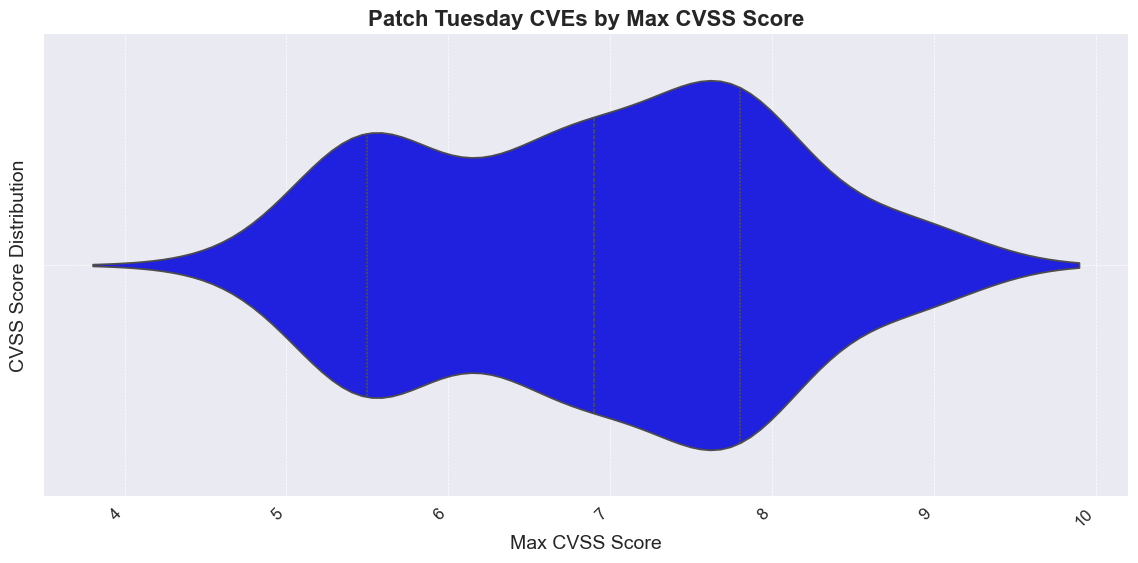

In [3]:
fig, axes = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")

sns.violinplot(data=msrc_epss_kev, x='Max CVSS', ax=axes, inner='quartile', color='blue')

plt.title('Patch Tuesday CVEs by Max CVSS Score', fontsize=16, fontweight='bold')
plt.xlabel('Max CVSS Score', fontsize=14)
plt.ylabel('CVSS Score Distribution', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
axes.grid(True, which='both', linestyle='--', linewidth=0.5)

sns.despine()

plt.show()

## Visualizing CVE Severity Distribution

This section of the notebook uses a bar plot to display the distribution of CVE (Common Vulnerabilities and Exposures) severities identified in the latest Patch Tuesday reports. The visualization helps stakeholders quickly grasp the urgency and distribution of severities within the newly released vulnerabilities.

### Visualization Steps:

1. **Data Preparation**:
   - **Counting Severities**: The script first calculates the frequency of each severity level present in the `Severity` column of the `msrc_epss_kev` DataFrame. This step is crucial for determining the number of CVEs associated with each severity level.

2. **Figure Setup**:
   - A figure and axis are created using Matplotlib with a specified size. The seaborn style 'whitegrid' is applied to enhance the visual readability of the plot.

3. **Bar Plot Creation**:
   - A bar plot is generated where the x-axis represents the severity levels, and the y-axis shows the number of CVEs for each severity.
   - The `viridis` color palette is used for the bars, which not only adds a visually pleasing gradient but also helps distinguish between different severity levels.

4. **Customizing Plot Details**:
   - **Title and Labels**: The plot includes a title and axes labels with custom font sizes and weights to ensure clarity and focus.
   - **Annotations**: Each bar in the plot is annotated with the count of CVEs to provide clear, immediate data points without needing to refer to the y-axis for values.
   - **Spine Removal**: The top and right plot spines are removed to clean up the visual presentation.

5. **Caption and Layout**:
   - A caption is added below the plot, citing 'Patch Tuesday Vulnerability Reports' as the data source, which aids in transparency and data attribution.
   - `plt.tight_layout()` is used to adjust the layout so that all elements are neatly contained within the figure canvas.

6. **Display the Plot**:
   - The plot is displayed within the notebook using `plt.show()`. This function call ensures that the plot renders correctly in the notebook environment.

### Plot Interpretation:
This bar plot provides a straightforward visualization of the severity distribution among the reported vulnerabilities, enabling quick insights into the security landscape for the observed period. It supports better resource allocation and risk management by highlighting the most critical areas based on severity.

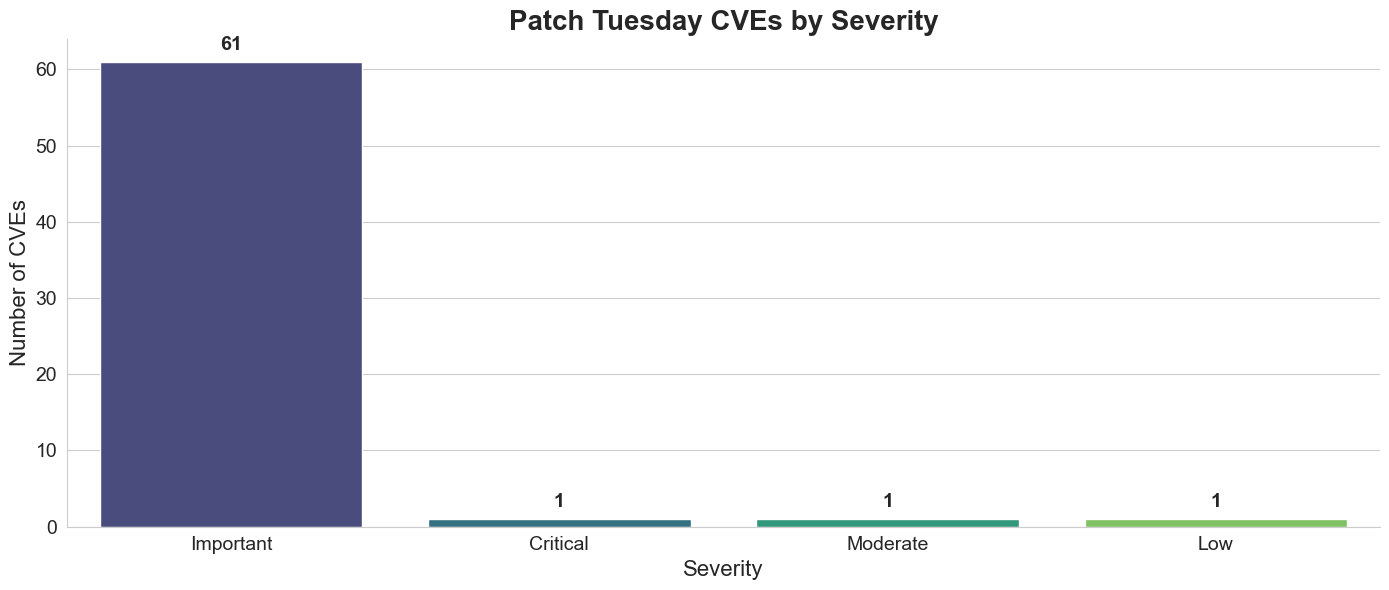

In [4]:
# Count the number of CVEs for each severity level
severity_counts = msrc_epss_kev['Severity'].value_counts()

# Set up the figure and axis
_, ax = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")

# Create the bar plot
palette = sns.color_palette("viridis", len(severity_counts))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette=palette, ax=ax, hue=severity_counts.index,
            legend=False)

# Set the title and labels with custom fonts and sizes
plt.title('Patch Tuesday CVEs by Severity', fontsize=20, fontweight='bold')
plt.xlabel('Severity', fontsize=16)
plt.ylabel('Number of CVEs', fontsize=16)

# Add annotations on top of each bar
for i in range(len(severity_counts)):
    ax.text(i, severity_counts.values[i] + 1, f"{severity_counts.values[i]}", ha='center', va='bottom', fontsize=14,
            fontweight='bold')

# Rotate x-axis labels if necessary
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Adding a caption
fig.text(0.5, -0.05, 'Data Source: Patch Tuesday Vulnerability Reports', ha='center', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

## Visualizing CVE Distribution by Product

This section of the notebook is dedicated to visualizing the distribution of Common Vulnerabilities and Exposures (CVEs) across different products as reported in the latest Patch Tuesday data. The visualization aims to provide a clear picture of which products are most frequently affected by vulnerabilities, aiding in prioritization and resource allocation for patching efforts.

### Steps for Visualization:

1. **Set Visual Style**:
   - The seaborn style 'whitegrid' is applied to ensure the plot is clear and grids are visible, which helps in accurately reading the number of CVEs.

2. **Count Unique Products**:
   - We first calculate the number of unique products affected by CVEs. This count is used to determine the number of colors needed for the plot, ensuring each product has a distinct color.

3. **Plot Setup**:
   - A figure and axis are set up with matplotlib, specifying a larger size to accommodate potentially numerous product categories.

4. **Create the Count Plot**:
   - Using seaborn's `countplot` function, we plot the number of CVEs for each product. 
   - Products are ordered by their frequency to highlight the most affected products prominently.
   - The `viridis` color palette is used, which provides a visually appealing gradient and helps in distinguishing between products.

5. **Customize Plot Details**:
   - **Title and Labels**: The plot includes a title and axes labels with increased font sizes and bold text for better readability.
   - **Rotation of X-ticks**: The labels on the x-axis are rotated 45 degrees to ensure that product names are legible, especially when there are many products.

6. **Annotation**:
   - Each bar is annotated with the height (number of CVEs), which makes it easy to see the exact number of CVEs for each product without referring to the axis scale.

7. **Grid and Spines**:
   - Grid lines are added to aid in visual estimation of the CVE counts.
   - The top and right spines are removed to clean up the plot appearance, focusing the viewer’s attention on the data.

8. **Layout Adjustment and Display**:
   - `plt.tight_layout()` is used to adjust the spacing to ensure that all plot elements are clearly visible.
   - The plot is then displayed using `plt.show()` to render it within the notebook.

### Interpretation:
This bar plot serves as an effective tool for quickly identifying which products are most vulnerable based on the latest Patch Tuesday releases. Organizations can use this information to prioritize their security measures and patch management strategies accordingly, focusing resources on the most impacted products.

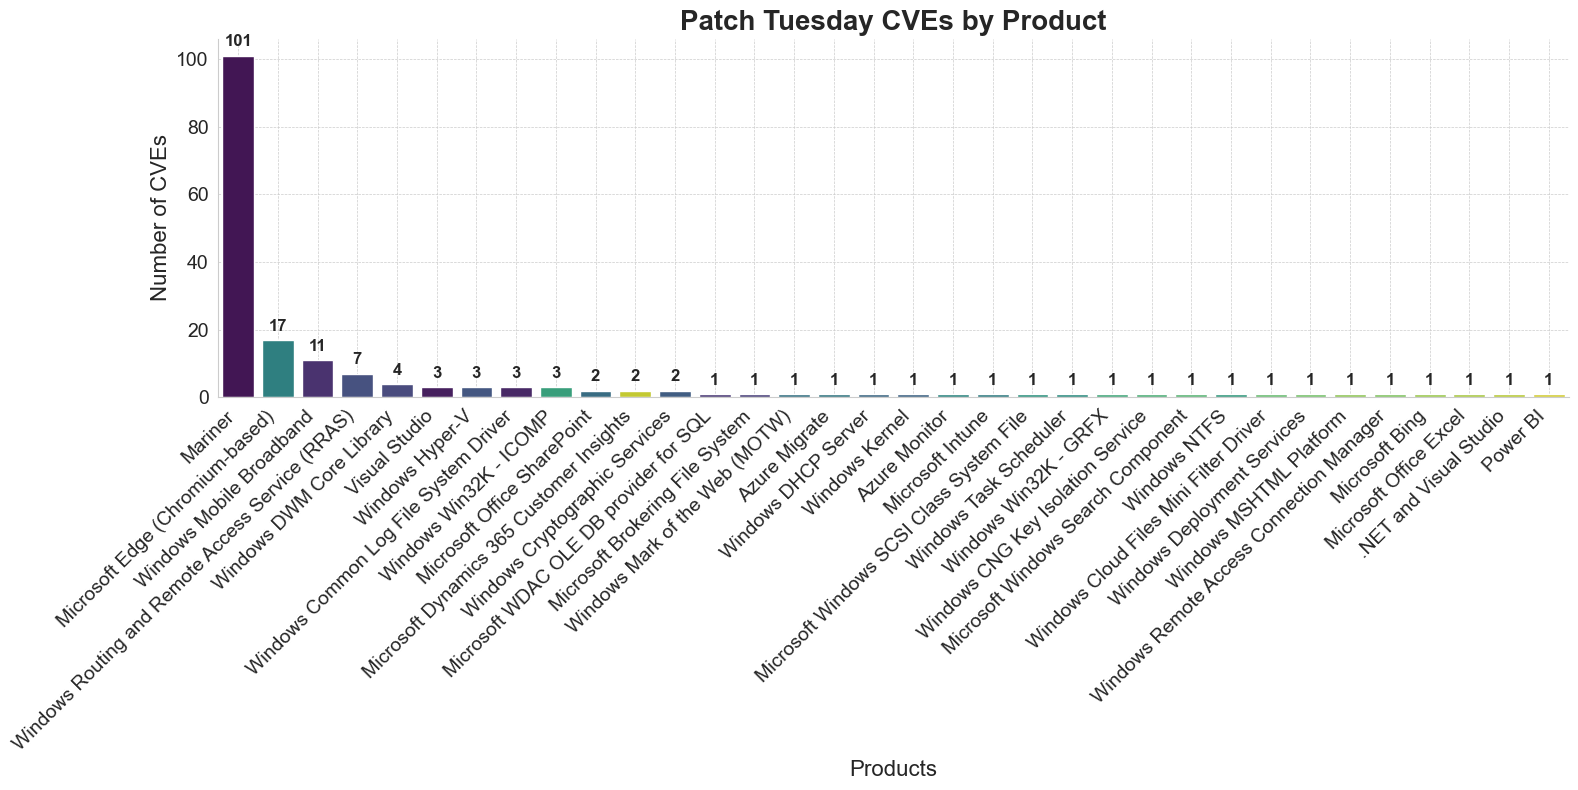

In [5]:
sns.set_style("whitegrid")

num_products = msrc_epss_kev['Product'].nunique()

fig, axes = plt.subplots(figsize=(16, 8))

palette = sns.color_palette("viridis", num_products)
sns.countplot(data=msrc_epss_kev, x='Product', ax=axes, order=msrc_epss_kev['Product'].value_counts().index,
              palette=palette,
              hue='Product',
              legend=False)

plt.title('Patch Tuesday CVEs by Product', fontsize=20, fontweight='bold')
plt.xlabel('Products', fontsize=16)
plt.ylabel('Number of CVEs', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=14)

plt.yticks(fontsize=14)

axes.grid(True, which='both', linestyle='--', linewidth=0.5)

for p in axes.patches:
    axes.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points', fontsize=12, fontweight='semibold')

sns.despine()
plt.tight_layout()
plt.show()